# Sofia Macarena Castillo Badilla

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [21]:
# Cargar datasets
animales = pd.read_csv("animales_eeg.csv")
alimentos = pd.read_csv("alimentos_eeg.csv")
herramientas = pd.read_csv("herramientas_eeg.csv")

In [22]:
# Matrices de conectividad - correlación --> no se puede coherencia espectral, son estímulos determinados
eeg_animales = animales.loc[:, 'Fp1':]
eeg_alimentos = alimentos.loc[:, 'Fp1':]
eeg_herramientas = herramientas.loc[:, 'Fp1':]

corr_animales = eeg_animales.corr()
corr_alimentos = eeg_alimentos.corr()
corr_herramientas = eeg_herramientas.corr()

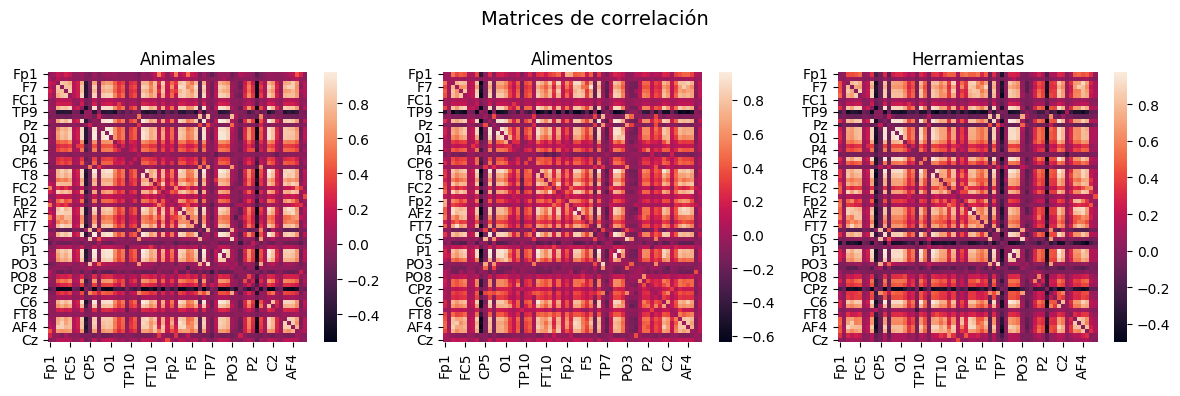

In [23]:
# Comparativa matrices de conectividad - hecha con correlación

np.fill_diagonal(corr_animales.values, 0)
np.fill_diagonal(corr_alimentos.values, 0)
np.fill_diagonal(corr_herramientas.values, 0)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(corr_animales, ax=axes[0])
axes[0].set_title("Animales")

sns.heatmap(corr_alimentos, ax=axes[1])
axes[1].set_title("Alimentos")

sns.heatmap(corr_herramientas, ax=axes[2])
axes[2].set_title("Herramientas")

fig.suptitle("Matrices de correlación", fontsize=14)
plt.tight_layout()
plt.show()

## Generación de estadísticos

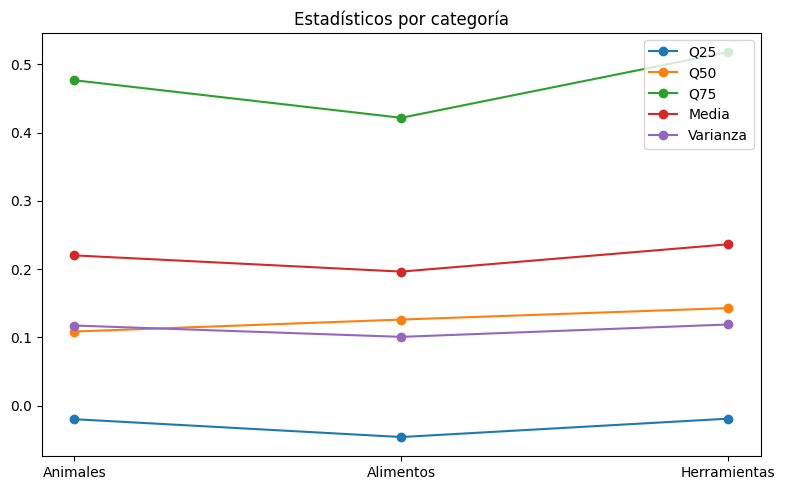

In [37]:
matrices = {
    "Animales": corr_animales,
    "Alimentos": corr_alimentos,
    "Herramientas": corr_herramientas
}

th25, th50, th75 = [], [], []
promedio, varianza = [], []
categorias = []

for nombre, matriz in matrices.items():
    data = matriz.stack().values
    categorias.append(nombre)
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(categorias, th25, marker='o', label="Q25")
ax.plot(categorias, th50, marker='o', label="Q50")
ax.plot(categorias, th75, marker='o', label="Q75")
ax.plot(categorias, promedio, marker='o', label="Media")
ax.plot(categorias, varianza, marker='o', label="Varianza")

ax.set_title("Estadísticos por categoría")
ax.legend()
plt.tight_layout()
plt.show()

## Evaluación de los estadísticos

In [38]:
# Función para filtrar la matriz 
def filter_top_connections(corr_matrix, percentile):
    
    # Create a copy to avoid modifying the original matrix
    filtered_matrix = corr_matrix.copy()

    # Set diagonal to NaN to exclude from percentile calculation
    np.fill_diagonal(filtered_matrix.values, np.nan)

    # Get all off-diagonal values and calculate the threshold
    # Use absolute values for 'strongest' connections
    abs_values = np.abs(filtered_matrix.values[~np.isnan(filtered_matrix.values)])

    # If there are no off-diagonal values, return a matrix of zeros
    if abs_values.size == 0:
        return corr_matrix * 0.0

    threshold = np.percentile(abs_values, 100 - percentile) # Top X% means threshold at 100-X percentile

    # Apply the filter: set values below threshold to 0
    # Also keep values between -threshold and threshold to 0 if they are not above threshold
    filtered_matrix[np.abs(filtered_matrix) < threshold] = 0

    # Set diagonal back to 1 (or 0 if preferred, but 1 is standard for correlation diagonals)
    np.fill_diagonal(filtered_matrix.values, 1.0)

    return filtered_matrix

Text(0.5, 0.98, 'Análisis estadísticos para categoría: animales')

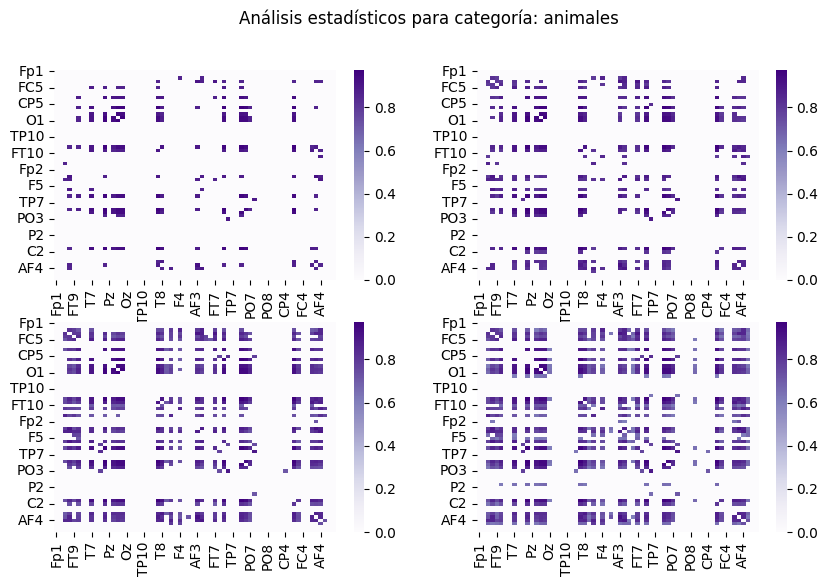

In [99]:
# ANIMALES

np.fill_diagonal(corr_animales.values, 0)

animales_df_1 = filter_top_connections(corr_animales, 5)
animales_df_2 = filter_top_connections(corr_animales, 10)
animales_df_3 = filter_top_connections(corr_animales, 15)
animales_df_4 = filter_top_connections(corr_animales, 20)

fig, axes = plt.subplots(2,2, figsize = (10, 6))

np.fill_diagonal(animales_df_1.values, 0)
sns.heatmap(animales_df_1, ax=axes[0, 0], cmap="Purples")
np.fill_diagonal(animales_df_2.values, 0)
sns.heatmap(animales_df_2, ax=axes[0, 1], cmap="Purples")
np.fill_diagonal(animales_df_3.values, 0)
sns.heatmap(animales_df_3, ax=axes[1, 0], cmap="Purples")
np.fill_diagonal(animales_df_4.values, 0)
sns.heatmap(animales_df_4, ax=axes[1, 1], cmap="Purples")

fig.suptitle('Análisis estadísticos para categoría: animales')

Text(0.5, 0.98, 'Análisis estadísticos para categoría: alimentos')

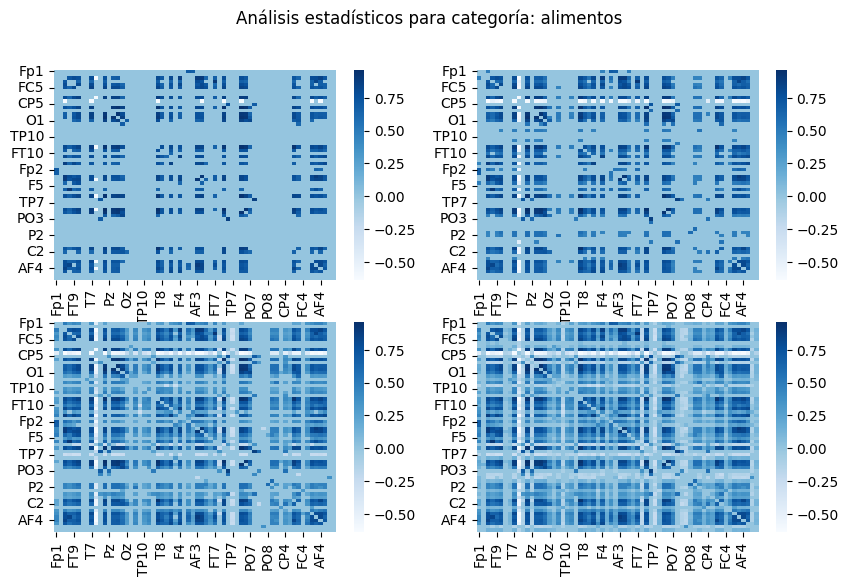

In [79]:
# ALIMENTOS

np.fill_diagonal(corr_alimentos.values, 0)

alimentos_df_1 = filter_top_connections(corr_alimentos, 15)
alimentos_df_2 = filter_top_connections(corr_alimentos, 25)
alimentos_df_3 = filter_top_connections(corr_alimentos, 45)
alimentos_df_4 = filter_top_connections(corr_alimentos, 75)

fig, axes = plt.subplots(2,2, figsize = (10, 6))

np.fill_diagonal(alimentos_df_1.values, 0)
sns.heatmap(alimentos_df_1, ax=axes[0, 0], cmap="Blues")
np.fill_diagonal(alimentos_df_2.values, 0)
sns.heatmap(alimentos_df_2, ax=axes[0, 1], cmap="Blues")
np.fill_diagonal(alimentos_df_3.values, 0)
sns.heatmap(alimentos_df_3, ax=axes[1, 0], cmap="Blues")
np.fill_diagonal(alimentos_df_4.values, 0)
sns.heatmap(alimentos_df_4, ax=axes[1, 1], cmap="Blues")

fig.suptitle('Análisis estadísticos para categoría: alimentos')

Text(0.5, 0.98, 'Análisis estadísticos para categoría: herramientas')

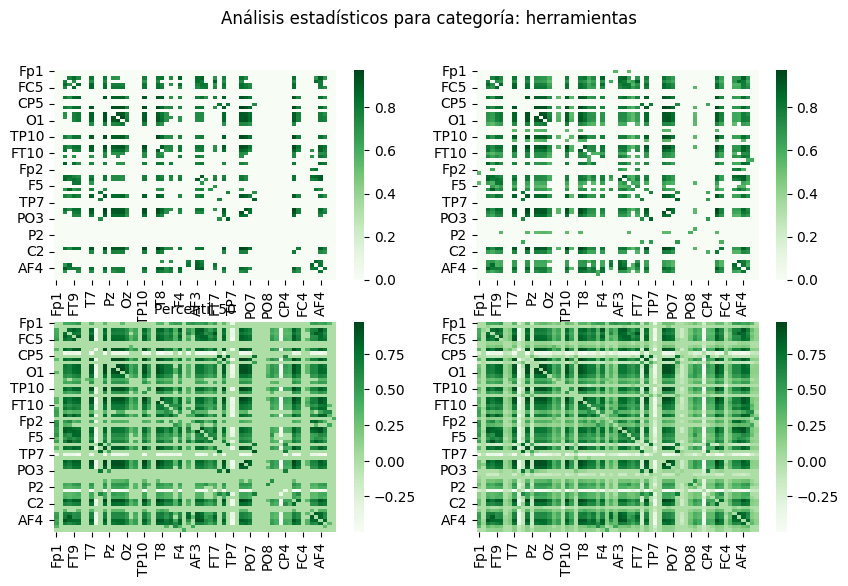

In [77]:
# HERRAMIENTAS

np.fill_diagonal(corr_herramientas.values, 0)

herramientas_df_1 = filter_top_connections(corr_herramientas, 15)
herramientas_df_2 = filter_top_connections(corr_herramientas, 25)
herramientas_df_3 = filter_top_connections(corr_herramientas, 45)
herramientas_df_4 = filter_top_connections(corr_herramientas, 75)

fig, axes = plt.subplots(2,2, figsize = (10, 6))

np.fill_diagonal(herramientas_df_1.values, 0)
sns.heatmap(herramientas_df_1, ax=axes[0, 0], cmap="Greens")
np.fill_diagonal(herramientas_df_2.values, 0)
sns.heatmap(herramientas_df_2, ax=axes[0, 1], cmap="Greens")
np.fill_diagonal(herramientas_df_3.values, 0)
sns.heatmap(herramientas_df_3, ax=axes[1, 0], cmap="Greens")
np.fill_diagonal(herramientas_df_4.values, 0)
sns.heatmap(herramientas_df_4, ax=axes[1, 1], cmap="Greens")
axes[1,0].set_title("Percentil 50", fontsize = 10)
fig.suptitle('Análisis estadísticos para categoría: herramientas')

## Generación de resultados
- grafos 2D
- grafos 3D
- comunidades
- hubs

In [151]:
# Convertir de dataframe a grafo
animales_grafo_ = nx.from_pandas_adjacency(animales_df_3)
alimentos_grafo_ = nx.from_pandas_adjacency(alimentos_df_1)
herramientas_grafo_ = nx.from_pandas_adjacency(herramientas_df_1)

In [152]:
# Cálculo de métricas por condición
(clust_coeff_an, path_length_an, small_world_sigma_an, communities_an, 
 modularity_an, betwenness_an, global_eff_an, local_eff_an, degree_dict_an) = metricas_grafo(animales_grafo_)

(clust_coeff_al, path_length_al, small_world_sigma_al, communities_al, 
 modularity_al, betwenness_al, global_eff_al, local_eff_al, degree_dict_al) = metricas_grafo(alimentos_grafo_)

(clust_coeff_h, path_length_h, small_world_sigma_h, communities_h, 
 modularity_h, betwenness_h, global_eff_h, local_eff_h, degree_dict_h) = metricas_grafo(herramientas_grafo_)

In [153]:
# Coordenadas de los 64 electrodos
# electrodos
ch_names = [
    "Fp1","Fz","F3","F7","FT9","FC5","FC1","C3","T7","TP9","CP5","CP1",
    "Pz","P3","P7","O1","Oz","O2","P4","P8","TP10","CP6","CP2","C4","T8",
    "FT10","FC6","FC2","F4","F8","Fp2","AF7","AF3","AFz","F1","F5","FT7",
    "FC3","C1","C5","TP7","CP3","P1","P5","PO7","PO3","POz","PO4","PO8",
    "P6","P2","CPz","CP4","TP8","C6","C2","FC4","FT8","F6","AF8","AF4",
    "F2","FCz","Cz"
]

# 2. Cargar montaje estándar 10–10
montage = mne.channels.make_standard_montage("standard_1020")

# 3. Obtener diccionario canal -> (x, y, z)
all_pos = montage.get_positions()["ch_pos"]

# 4. Filtrar solo tus canales y construir DataFrame
coords_dict = {ch: all_pos[ch] for ch in ch_names}
eeg_coords = pd.DataFrame(coords_dict, index=["x", "y", "z"]).T

print(eeg_coords.head())

            x         y         z
Fp1 -0.029437  0.083917 -0.006990
Fz   0.000312  0.058512  0.066462
F3  -0.050244  0.053111  0.042192
F7  -0.070263  0.042474 -0.011420
FT9 -0.084076  0.014567 -0.050429


('FC5', 0.02289544680834813)
[frozenset({'Fp2', 'FT10', 'AF8', 'F7', 'T7', 'F6', 'P5', 'PO7', 'C4', 'P3', 'T8', 'P1', 'C1', 'C2', 'FT7', 'O1', 'C6', 'AF3', 'CP1', 'P7'}), frozenset({'AFz', 'AF4', 'F3', 'F4', 'FC6', 'F5', 'FC5', 'FT9', 'F2', 'F1'}), frozenset({'C5', 'CP4', 'CP5', 'FC3', 'PO3'}), frozenset({'Fp1'}), frozenset({'Fz'}), frozenset({'FC1'}), frozenset({'C3'}), frozenset({'TP9'}), frozenset({'Pz'}), frozenset({'Oz'}), frozenset({'O2'}), frozenset({'P4'}), frozenset({'P8'}), frozenset({'TP10'}), frozenset({'CP6'}), frozenset({'CP2'}), frozenset({'FC2'}), frozenset({'F8'}), frozenset({'AF7'}), frozenset({'TP7'}), frozenset({'CP3'}), frozenset({'POz'}), frozenset({'PO4'}), frozenset({'PO8'}), frozenset({'P6'}), frozenset({'P2'}), frozenset({'CPz'}), frozenset({'TP8'}), frozenset({'FC4'}), frozenset({'FT8'}), frozenset({'FCz'}), frozenset({'Cz'})]


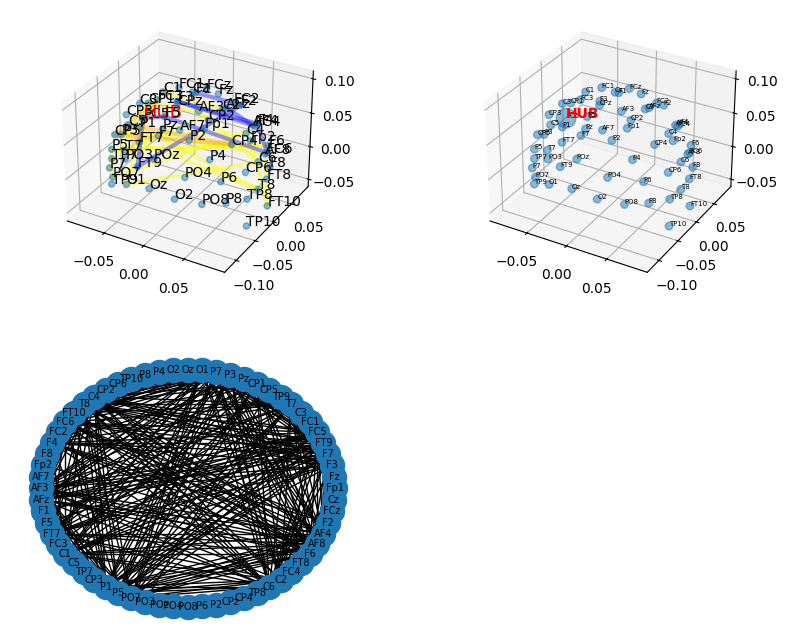

In [154]:
# Grafo de resultados para animales
hub_an = betwenness_an[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_an, hub_an, eeg_coords, axes[0])
grafo3D(eeg_coords, hub_an, axes[1])
ensayo_grafo = grafo2D(animales_df_3, axes[2])

print(hub_an)
print(communities_an)

('Fp2', 0.03072196620583717)
[frozenset({'AF4', 'Fp2', 'FT7', 'TP9', 'AF7', 'F7', 'AF8', 'T7', 'F6', 'AF3', 'Fp1', 'P1'}), frozenset({'AFz', 'FC6', 'FT10', 'F3', 'F4', 'FC5', 'C6', 'T8', 'FT9', 'F2', 'F1'}), frozenset({'C1', 'C2', 'O1', 'P5', 'PO7', 'C4', 'P3', 'CP1', 'Oz', 'P7'}), frozenset({'C5', 'PO3', 'CP5'}), frozenset({'Fz'}), frozenset({'FC1'}), frozenset({'C3'}), frozenset({'Pz'}), frozenset({'O2'}), frozenset({'P4'}), frozenset({'P8'}), frozenset({'TP10'}), frozenset({'CP6'}), frozenset({'CP2'}), frozenset({'FC2'}), frozenset({'F8'}), frozenset({'F5'}), frozenset({'FC3'}), frozenset({'TP7'}), frozenset({'CP3'}), frozenset({'POz'}), frozenset({'PO4'}), frozenset({'PO8'}), frozenset({'P6'}), frozenset({'P2'}), frozenset({'CPz'}), frozenset({'CP4'}), frozenset({'TP8'}), frozenset({'FC4'}), frozenset({'FT8'}), frozenset({'FCz'}), frozenset({'Cz'})]


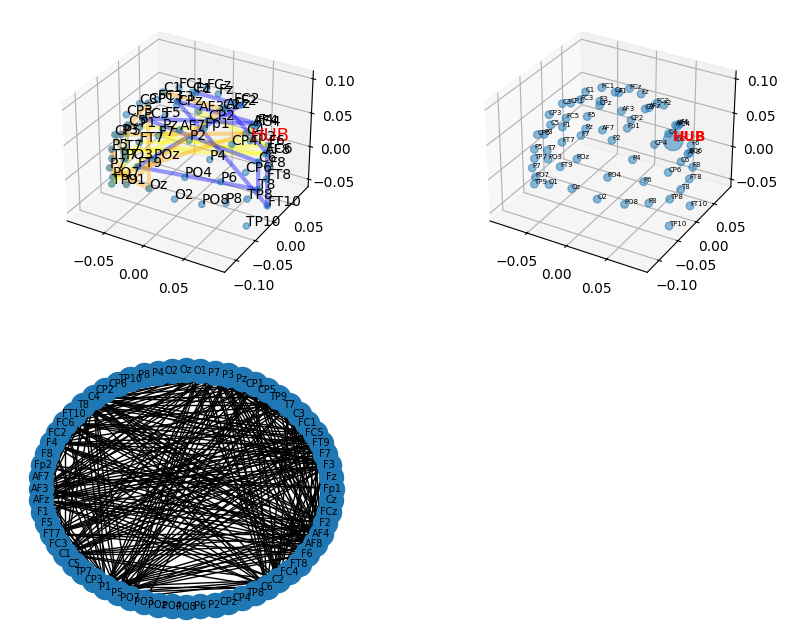

In [155]:
# Grafo de resultados para alimentos
hub_al = betwenness_al[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_al, hub_al, eeg_coords, axes[0])
grafo3D(eeg_coords, hub_al, axes[1])
ensayo_grafo = grafo2D(alimentos_df_1, axes[2])

print(hub_al)
print(communities_al)

('FT7', 0.016385801296783138)
[frozenset({'Fp2', 'F4', 'FC6', 'F5', 'F7', 'F6', 'AF8', 'T7', 'FC5', 'FT9', 'AF4', 'F3', 'AFz', 'FT7', 'AF3', 'F1'}), frozenset({'FT10', 'TP10', 'P5', 'PO7', 'C4', 'T8', 'P3', 'Oz', 'P1', 'C1', 'C2', 'O1', 'C6', 'CP1', 'P7', 'F2'}), frozenset({'C5', 'PO3', 'CP5', 'FC3'}), frozenset({'Fp1'}), frozenset({'Fz'}), frozenset({'FC1'}), frozenset({'C3'}), frozenset({'TP9'}), frozenset({'Pz'}), frozenset({'O2'}), frozenset({'P4'}), frozenset({'P8'}), frozenset({'CP6'}), frozenset({'CP2'}), frozenset({'FC2'}), frozenset({'F8'}), frozenset({'AF7'}), frozenset({'TP7'}), frozenset({'CP3'}), frozenset({'POz'}), frozenset({'PO4'}), frozenset({'PO8'}), frozenset({'P6'}), frozenset({'P2'}), frozenset({'CPz'}), frozenset({'CP4'}), frozenset({'TP8'}), frozenset({'FC4'}), frozenset({'FT8'}), frozenset({'FCz'}), frozenset({'Cz'})]


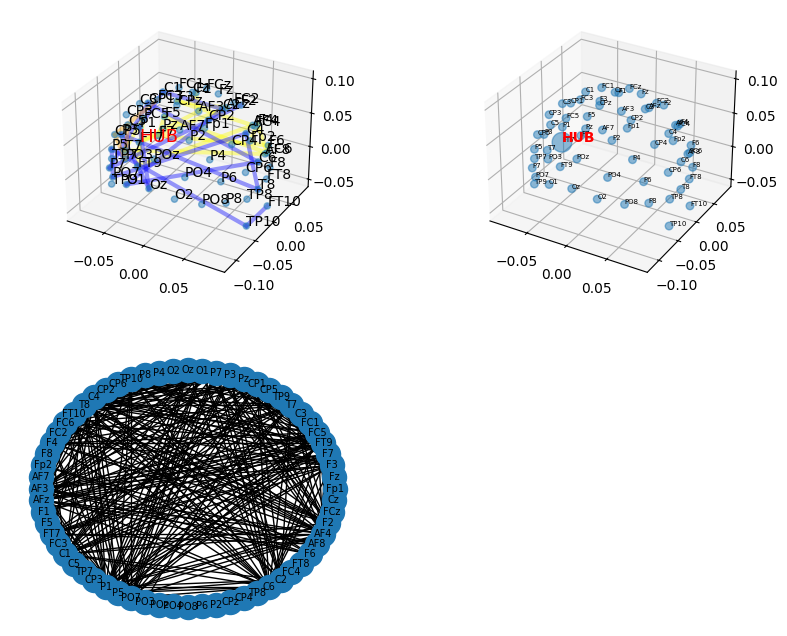

In [156]:
# Grafo de resultados para herramientas
hub_h = betwenness_h[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_h, hub_h, eeg_coords, axes[0])
grafo3D(eeg_coords, hub_h, axes[1])
ensayo_grafo = grafo2D(herramientas_df_1, axes[2])

print(hub_h)
print(communities_h)

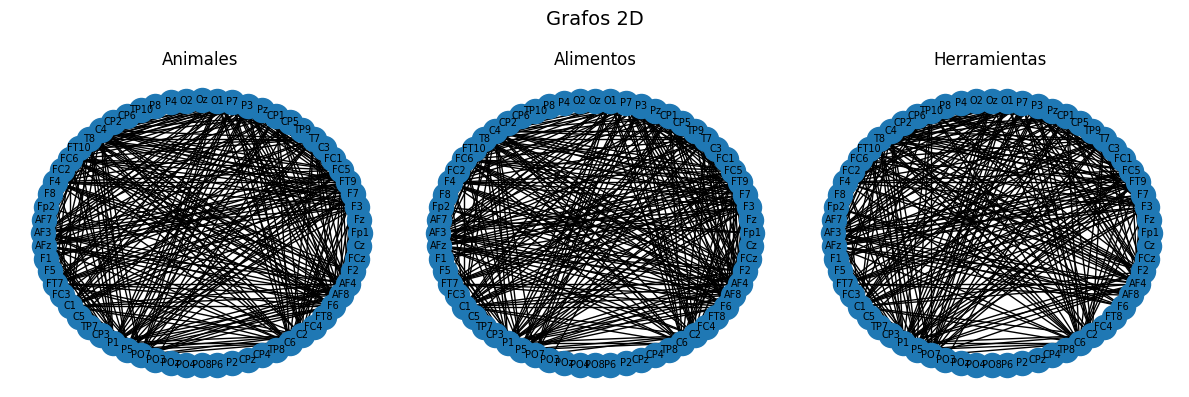

In [157]:
# Comparación grafos 2d
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

ensayo_grafo = grafo2D(animales_df_3, axes[0])
axes[0].set_title("Animales")

ensayo_grafo = grafo2D(alimentos_df_1, axes[1])
axes[1].set_title("Alimentos")

ensayo_grafo = grafo2D(herramientas_df_1, axes[2])
axes[2].set_title("Herramientas")

fig.suptitle("Grafos 2D", fontsize=14)
plt.tight_layout()
plt.show()

Text(0.5, 0.92, 'Herramientas')

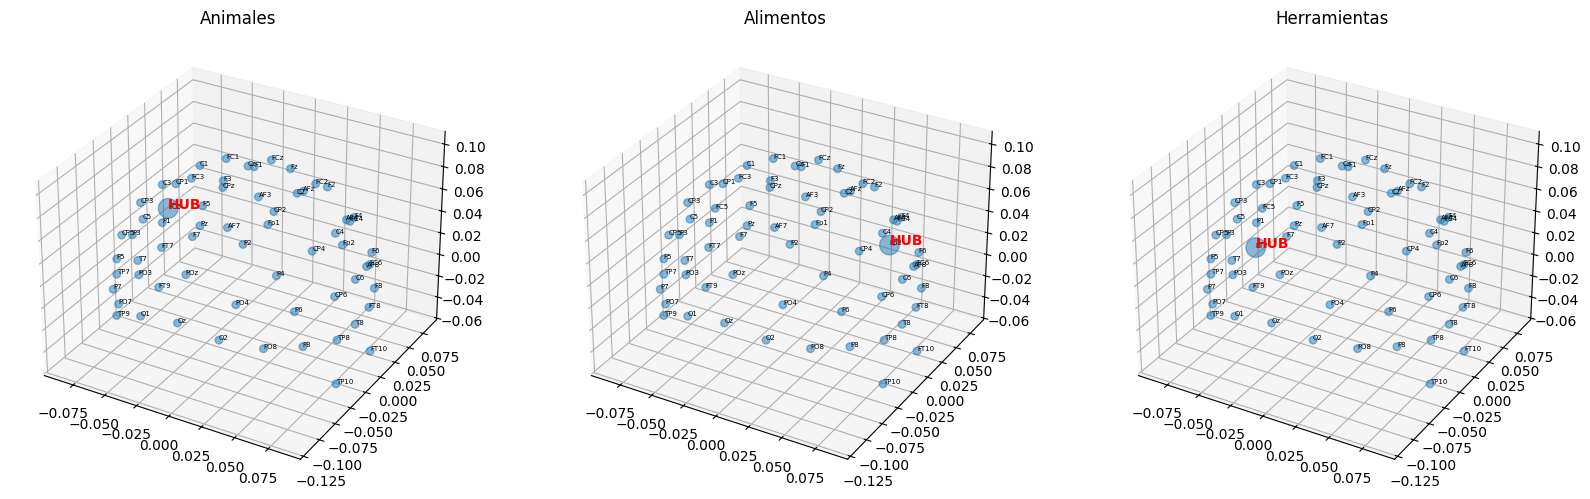

In [158]:
# Comparación grafos 3D

fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(1, 3, 1, projection='3d'), 
        fig.add_subplot(1, 3, 2, projection='3d'),
       fig.add_subplot(1, 3, 3, projection='3d')]

grafo3D(eeg_coords, hub_an, axes[0])
axes[0].set_title("Animales")
grafo3D(eeg_coords, hub_al, axes[1])
axes[1].set_title("Alimentos")
grafo3D(eeg_coords, hub_h, axes[2])
axes[2].set_title("Herramientas")

Text(0.5, 0.92, 'Herramientas')

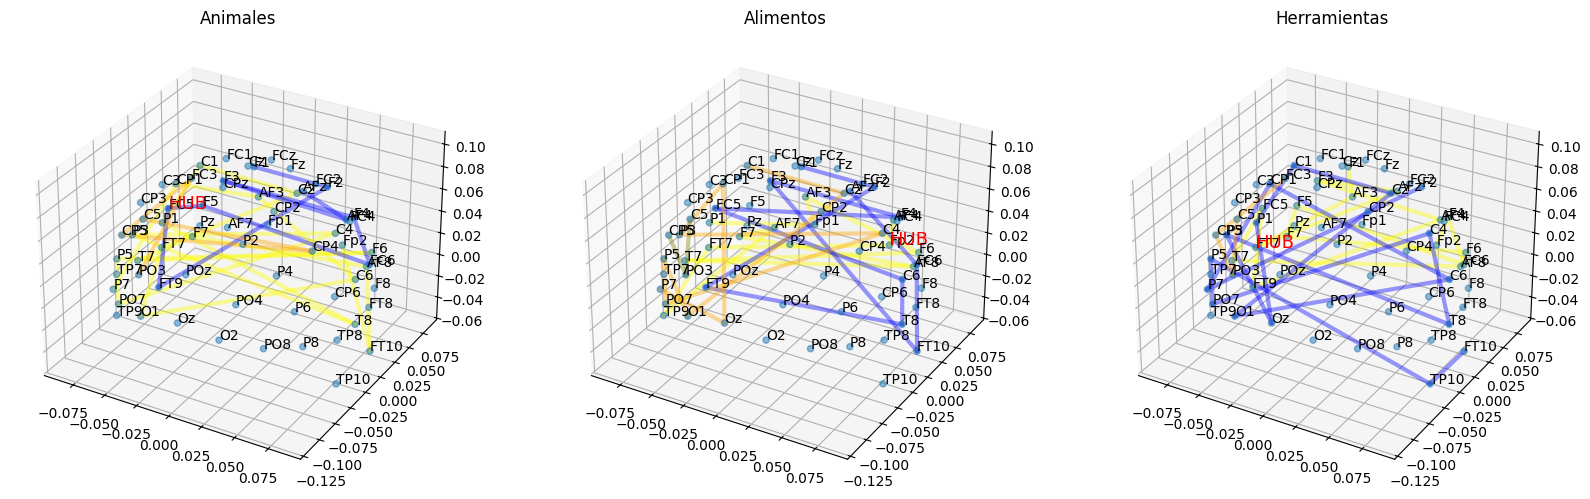

In [159]:
# Comparación grafos comunidades

fig = plt.figure(figsize=(20, 15))
axes = [fig.add_subplot(1, 3, 1, projection='3d'), 
        fig.add_subplot(1, 3, 2, projection='3d'),
       fig.add_subplot(1, 3, 3, projection='3d')]

grafo_comunidades(communities_an, hub_an, eeg_coords, axes[0])
axes[0].set_title("Animales")
grafo_comunidades(communities_al, hub_al, eeg_coords, axes[1])
axes[1].set_title("Alimentos")
grafo_comunidades(communities_h, hub_h, eeg_coords, axes[2])
axes[2].set_title("Herramientas")

In [160]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para proyección 3d
from matplotlib import cm

def plot_grafo_3d(G, coords_df, ax=None, title=None,
                  node_size_base=100, edge_alpha=0.8,
                  cmap_name="YlGnBu"):
    """
    Grafica un grafo 3D:
      - tamaño de nodos proporcional al grado
      - color de aristas según el peso (correlación)
    """
    if ax is None:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection="3d")
    
    # Asegurar que solo usamos nodos que tienen coordenadas
    nodos_validos = [n for n in G.nodes if n in coords_df.index]
    G = G.subgraph(nodos_validos).copy()
    
    # --- Grados (para tamaños de nodos) ---
    degree_dict = dict(G.degree())  # grado no ponderado
    # Si quieres grado ponderado: G.degree(weight="weight")
    
    # Normalizar tamaños
    max_degree = max(degree_dict.values()) if degree_dict else 1
    node_sizes = []
    xs, ys, zs = [], [], []
    
    for n in G.nodes():
        xs.append(coords_df.loc[n, "x"])
        ys.append(coords_df.loc[n, "y"])
        zs.append(coords_df.loc[n, "z"])
        # tamaño proporcional al grado
        node_sizes.append(node_size_base * (degree_dict[n] / max_degree + 0.2))
        # +0.2 para que los de grado muy bajo no desaparezcan
    
    # --- Colores de aristas según peso ---
    pesos = [d["weight"] for (_, _, d) in G.edges(data=True)]
    if len(pesos) == 0:
        vmin, vmax = 0, 1
    else:
        vmin, vmax = min(pesos), max(pesos)
    
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)
    
    # Dibujar aristas
    for u, v, d in G.edges(data=True):
        x = [coords_df.loc[u, "x"], coords_df.loc[v, "x"]]
        y = [coords_df.loc[u, "y"], coords_df.loc[v, "y"]]
        z = [coords_df.loc[u, "z"], coords_df.loc[v, "z"]]
        color = cmap(norm(d["weight"]))
        ax.plot(x, y, z, color=color, alpha=edge_alpha, linewidth=1.5)
    
    # Dibujar nodos
    sc = ax.scatter(xs, ys, zs, s=node_sizes, c="yellow", alpha=0.3)
    
    # Opcional: etiquetas de canales
    for n in G.nodes():
        ax.text(coords_df.loc[n, "x"],
                coords_df.loc[n, "y"],
                coords_df.loc[n, "z"],
                n, fontsize=6)
    
    # Ajustes de eje
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    if title:
        ax.set_title(title)
    
    # Barra de colores para las aristas
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.05, label="Correlación")
    
    return ax

C:\Users\marub\AppData\Local\Temp\ipykernel_25372\605889086.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


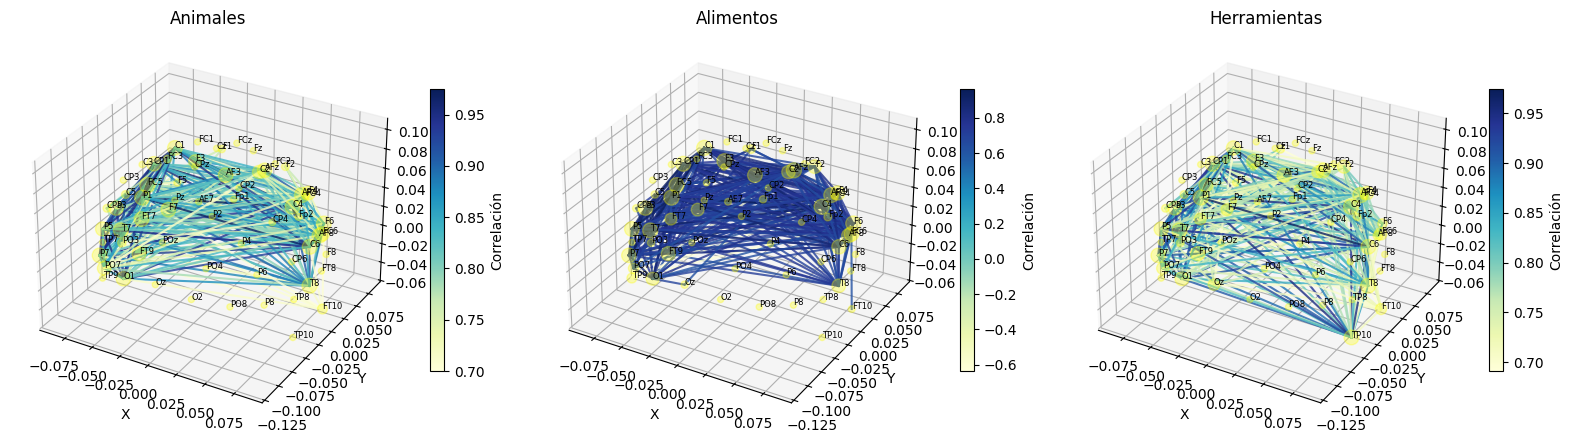

In [162]:
fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

plot_grafo_3d(animales_grafo_, eeg_coords, ax=ax1, title="Animales",)
plot_grafo_3d(alimentos_grafo_, eeg_coords, ax=ax2, title="Alimentos")
plot_grafo_3d(herramientas_grafo_, eeg_coords, ax=ax3, title="Herramientas")

plt.tight_layout()
plt.show()

In [168]:
def grafo_3d_nodos(G, coords_df, ax, node_size_base=150, title=None):
    """
    Dibuja SOLO nodos en 3D, con tamaño proporcional al grado, 
    sobre el eje 'ax' que se pasa como argumento.
    NO crea figuras nuevas.
    """
    # Nodos que existen en ambas partes
    nodos_validos = [n for n in G.nodes if n in coords_df.index]
    if len(nodos_validos) == 0:
        print("No hay nodos en común entre el grafo y eeg_coords.index")
        return

    # Grados
    degree_dict = dict(G.degree())
    max_degree = max(degree_dict.values()) if degree_dict else 1

    xs, ys, zs, sizes = [], [], [], []

    for n in nodos_validos:
        xs.append(coords_df.loc[n, "x"])
        ys.append(coords_df.loc[n, "y"])
        zs.append(coords_df.loc[n, "z"])
        sizes.append(node_size_base * (degree_dict[n] / max_degree + 0.2))

    # Dibujar nodos
    ax.scatter(xs, ys, zs, s=sizes, color="lightblue", alpha=0.6)

    # Etiquetas
    for n in nodos_validos:
        ax.text(coords_df.loc[n, "x"],
                coords_df.loc[n, "y"],
                coords_df.loc[n, "z"],
                n, fontsize=10)

    # Estética
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    if title:
        ax.set_title(title)

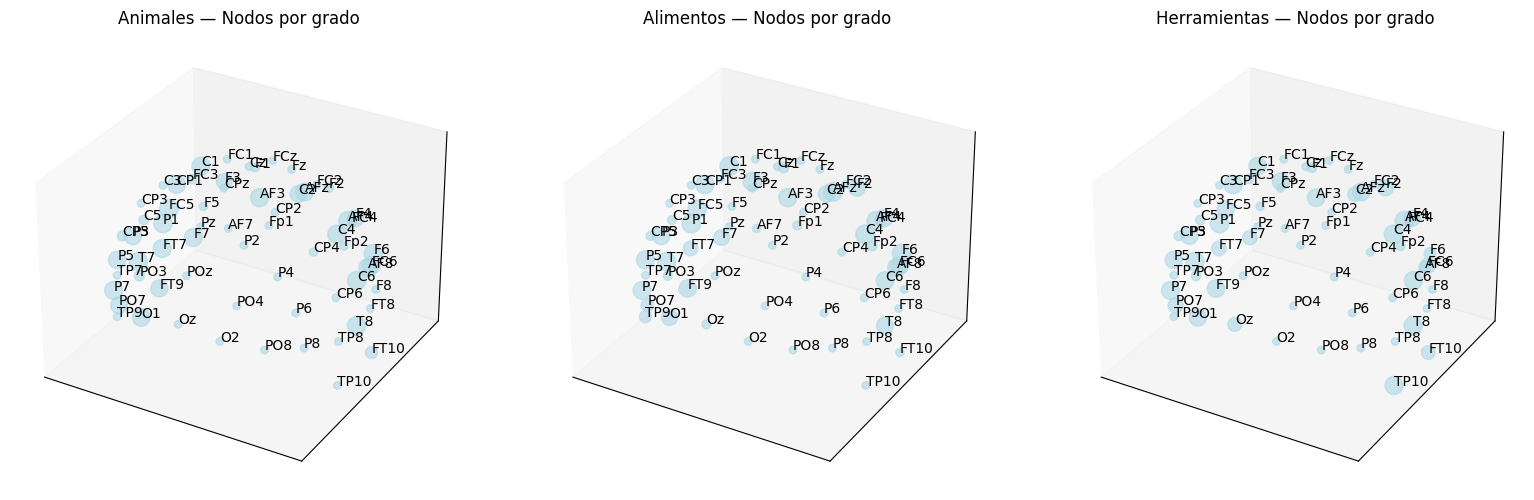

In [169]:
fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

grafo_3d_nodos(animales_grafo_, eeg_coords, ax=ax1, title="Animales — Nodos por grado")
grafo_3d_nodos(alimentos_grafo_, eeg_coords, ax=ax2, title="Alimentos — Nodos por grado")
grafo_3d_nodos(herramientas_grafo_, eeg_coords, ax=ax3, title="Herramientas — Nodos por grado")

plt.tight_layout()
plt.show()




## Reporte

Reporte proyecto final

Resumen

Se realizó el análisis por teoría de grafos al dataset seleccionado para el proyecto. Primero se seleccionaron las métricas necesarias para generar la matriz de conectividad que fue utilizada para generar el grafo. El grafo incluyó uno 2D y otro 3D, así como uno donde se resaltaban las comunidades y otro donde se resaltaban los grados de los nodos por cada una de las 3 condiciones del experimento. 

Introducción

Los datos fueron obtenidos de Human EEG recordings for 1,854 concepts presented in rapid serial visual presentation streams (Tijl Grootswagers et al., 2022). Se utilizó una presentación visual serial rápida (PVSR) de estímulos visuales, este paradigma consiste en la muestra rápida de múltiples estímulos en una ubicación fija de la pantalla. Este modelo es ampliamente utilizado para estudiar cómo procesa el cerebro la información de forma rápida. 
El experimento contaba de 50 sujetos a los cuales se les presentó un total de 22,248 imágenes, pertenecientes a 1,854 conceptos, de los cuales cada uno contenía 12 imágenes. Estas fueron presentadas a 10 Hz, 50 ms del estímulo y 50 ms la pantalla en blanco. Los sujetos incluían 36 mujeres y 14 hombres con edades entre 17-30, de los cuales 26 eran hablantes de ingles nativos, 24 no nativos, 24 monolingües y 25 bilingües. 
Los estímulos fueron obtenidos de la base de datos THINGS. 

El dataset utilizado contaba de dos secciones, en una de ellas se especificaba la señal del EEG detectada cada 0.004 s, en cada canal por cada sujeto. La segunda parte contenía el orden de presentación de los estímulos, sus nombres y el tiempo de presentación de las imágenes. Se realizó una unión de ambos datos para generar uno que incluyera la activación correspondiente al estímulo de interés. 
Debido a la gran cantidad de información, se decidió generar tres categorías (animales, alimentos y herramientas), donde se agruparon 10 conceptos, cada uno con 4 imágenes que lo representaba. Solo se excluyó al sujeto 6 del análisis, ya que no contaba con la información de la activación de su electroencefalograma. 


Metodología y resultados

1. Generar matrices de conectividad.
- Se seleccionó el método de correlación de Pearson, ya que al tratarse de datos no continuos no era conveniente analizarlo por coherencia o phase locking value. La correlación es útil para identificar sincronización entre los canales.

2. Generación de estadísticos por condición

3. Evaluación de los estadísticos
- Determinar el umbral adecuado para cada matriz. En este caso se utilizaron percentiles para filtrar la matriz, ya que al tratarse de una correlación era lo más adecuado. 
El percentil utilizado para las tres condiciones fue de 85. Este umbral conserva el 15% de las conexiones más fuertes, lo cual nos permite la identificación de las áreas involucradas en cada categoría y nos permite realizar las comparaciones posteriores. 

4. Generación de los resultados
- A partir de las matrices filtradas se generó un grafo por categoría y se calcularon las métricas necesarias
Se realizaron grafos 2D, 3D, de comunidades, del tamaño de los nodos (determinado por su grado) y de la correlación entre los nodos. 

Discusión y conclusión

Animales

Se encontró el huben el electrodo FC5. Este se encuentra localizado cerca del área premotora primaria izquierda y la corteza prefrontal dorsolateral (CPDL). Estas áreas están relacionadas con funciones ejecutivas y el inicio del movimiento. Contribuye a la atención espacial. 

Alimentos

El hub correspondía a FP2. Corresponde a la corteza prefrontal derecha, involucrada también en la toma de decisiones y regulación emocional. Es importante para el control de impulsos, ya que regula la inhibición. 

Herramientas

El hub detectado fue FT7, correspondiente a la corteza frontotemporal izquierda. Controla el lenguaje expresivo, es importante también en el procesamiento semántico 

Los resultados obtenidos nos indican que las áreas frontales son vitales para la rápida detección de estímulos visuales, esto lo podemos concluir por la coincidencia de los hubs en estas áreas. 
Debido al corto tiempo de presentación de las imágenes (50 ms), no permite la generación de patrones de actividad específicos para cada categoría, sin embargo, destaca la importancia de la corteza prefrontal para la detección de estímulos.
En conjunto, los resultados sugieren que la percepción inicial depende de redes frontales de control, más que de regiones específicas de reconocimiento semántico. Esto evidencia la relevancia de la corteza prefrontal en la detección general de estímulos visuales, independientemente de su categoría, y respalda la idea de que la categorización fina ocurre en etapas temporales posteriores.



Referencias
Grootswagers, T., Zhou, I., Robinson, A. K., Hebart, M. N., & Carlson, T. A. (2022). Human EEG recordings for 1,854 concepts presented in rapid serial visual presentation streams. Scientific Data, 9(1). https://doi.org/10.1038/s41597-021-01102-7

Hebart, M. (2021). THINGS. Things-Initiative.org. https://things-initiative.org/projects/things-images/ 

Madaan, V., Bestha, D. P., & Wilson, D. R. (2012). Electroconvulsive Therapy and Transcranial Magnetic Stimulation. Encyclopedia of Human Behavior, 13–14. https://doi.org/10.1016/b978-0-12-375000-6.00253-6 

Mohn, E. (2023). Prefrontal cortex (PFC) | Research Starters | EBSCO Research. EBSCO. https://www.ebsco.com/research-starters/health-and-medicine/prefrontal-cortex-pfc 

John, Poldrack, R. A., & Desmond, J. E. (1998). The role of left prefrontal cortex in language and memory. Proceedings of the National Academy of Sciences, 95(3), 906–913. https://doi.org/10.1073/pnas.95.3.906 
